# Ein Jupyter-Kernel für Logik und Mengentheorie

### David Geleßus, Michael Leuschel
### Bad Honnef, 2019

# Einführung: Notebooks, Jupyter

## Was ist ein Notebook?

* Dokument mit Text und ausführbaren Code-Abschnitten
* Code kann interaktiv ausgeführt werden
* Ergebnisse erscheinen im Notebook unter dem jeweiligem Code
* Ähnlich wie eine REPL (read-eval-print-loop), mit einigen Unterschieden:
    * Code-Abschnitte können "außer der Reihe" bearbeitet und ausgeführt werden
    * Ausgaben können formatierten Text und Grafiken enthalten
    * Speicherbar als Datei
    * Code kann später neu ausgeführt werden
    * Weitergabe an andere Nutzer möglich
* Implementierungen: Mathematica, Maple, Jupyter, u. a.

## Jupyter Notebook

* Browserbasierte Notebook-Oberfläche
* Open Source und plattformübergreifend
* Stammt aus der Python-Community, in Python implementiert
* Jupyter-Notebooks können aber verschiedene Programmiersprachen verwenden
* Dazu trennt Jupyter strikt zwischen Frontend und Kernel:
    * Das allgemeine **Frontend** implementiert z. B. Benutzeroberfläche und Dateiformat
    * Ein sprachspezifischer **Kernel** stellt die Sprache dem Frontend zur Verfügung
* Schnittstellen zwischen Frontend und Kernel sind sprachneutral
    * Kernel können in (fast) jeder Sprache implementiert werden, kein Python-Code nötig

## ProB

* Werkzeug zur Animation, Verifikation und Visualisierung formeller Spezifikationen
* Grundlage: Solver für Prädikatenlogik, Mengentheorie mit Relationen, Funktionen und Arithmetik.
* Unterstützt hauptsächlich B-Spezifikationen (klassisches B, Event-B)
* Versteht auch andere Sprachen wie TLA<sup>+</sup> und CSP<sub>M</sub>
* ProBs APIs sind für alle Sprachen gleich
    * Der ProB 2-Jupyter-Kernel unterstützt daher (fast) alle Sprachen, die ProB versteht

## Architektur von ProB

* **`probcli`:** Kern/Hauptteil von ProB
    * Implementiert in SICStus Prolog
    * Erlaubt Animation, Visualisierung, Verifikation von formellen Spezifikationen
    * Unterstützt u. A. (klassisches) B, Event-B, TLA<sup>+</sup>, CSP<sub>M</sub>
    * Kommandozeilentool oder interaktive REPL
* **ProB 2-Java-API:** (aka ProB 2-Kernel; ≠ ProB 2-Jupyter-Kernel!)
    * Objektorientierte Java-Schnittstelle für ProB
    * Verwaltet automatisch eine oder mehrere `probcli`-Instanzen
* **ProB 2-Jupyter-Kernel:** Jupyter-Kernel-Implementierung für ProB
    * In Java implementiert
    * Ansteuerung von ProB durch ProB 2-Java-API
    * Kommunikation mit Jupyter durch Jupyter-JVM-BaseKernel

## Formeln auswerten

* B-Ausdrücke auswerten und Prädikate lösen wie in `probcli -repl`

Zum Beispiel, Primzahlen bis 50 ausgeben:

In [2]:
{x | x > 1 & x < 50 & not(#y.(y > 1 & y < x & x mod y = 0))}

$\{2,3,5,7,11,13,17,19,23,29,31,37,41,43,47\}$

In [4]:
:prettyprint x > 1 & x < 50 & not(#y.(y > 1 & y < x & x mod y = 0))

x > 1 ∧ x < 50 ∧ ¬(∃y·(y > 1 ∧ y < x ∧ x mod y = 0))

Eingabe als Unicode ist auch erlaubt:

In [7]:
{x | x>1 ∧ x<50 ∧ ¬(∃y.(y>1 ∧ y<x ∧ x mod y=0))}

$\{2,3,5,7,11,13,17,19,23,29,31,37,41,43,47\}$

Mehrzeilige Eingabe ist möglich, es gibt Syntax-Highlighting und Code Completion.

In [8]:
{S, E, N, D, M, O, R, Y} <: 0..9
& S > 0 & M > 0
& card({S, E, N, D, M, O, R, Y}) = 8
&
            S*1000 + E*100 + N*10 + D
+           M*1000 + O*100 + R*10 + E
= M*10000 + O*1000 + N*100 + E*10 + Y

$\mathit{TRUE}$

**Solution:**
* $\mathit{R} = 8$
* $\mathit{S} = 9$
* $\mathit{D} = 7$
* $\mathit{E} = 5$
* $\mathit{Y} = 2$
* $\mathit{M} = 1$
* $\mathit{N} = 6$
* $\mathit{O} = 0$

Mithilfe der Mengentheorie kann man alle Lösungen finden, und mit dem ```:table``` Kommando als Tabelle ausgeben.

In [12]:
:table {S,E,N,D,M,O,R,Y |

{S, E, N, D, M, O, R, Y} <: 0..9
& S > 0 & M > 0 // <--
& card({S, E, N, D, M, O, R, Y}) = 8
&
            S*1000 + E*100 + N*10 + D
+           M*1000 + O*100 + R*10 + E
= M*10000 + O*1000 + N*100 + E*10 + Y

}

|S|E|N|D|M|O|R|Y|
|---|---|---|---|---|---|---|---|
|$9$|$5$|$6$|$7$|$1$|$0$|$8$|$2$|


In B sind Folgen auch Funktionen, Funktionen auch Relationen, Relationen auch Mengen.
Relationen können in Jupyter auch grafisch dargestellt werden.

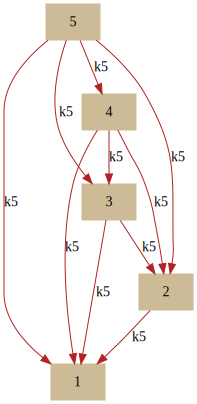

In [13]:
:dot expr_as_graph ("k5",{x,y|x:1..5 & y:1..5 & x>y})

In [14]:
:pref DOT_ENGINE=circo

Preference changed: DOT_ENGINE = circo


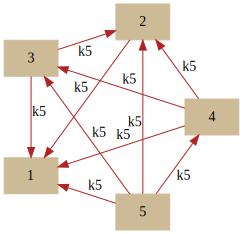

In [15]:
:dot expr_as_graph ("k5",{x,y|x:1..5 & y:1..5 & x>y})

# Anwendungsmöglichkeiten

## Interaktive Nutzung als REPL

* Jupyter Notebook kann wie eine REPL benutzt werden
* Vorteile: mehrzeilige Eingaben, formatierte Ausgaben, verbesserte Editor-Funktionen, speicherbar
* Alternative: `jupyter console` ermöglicht Verwendung von Jupyter-Kerneln im Terminal
    * Verhält sich wie eine klassische REPL, arbeitet nicht mit Notebooks
    * Unterstützt trotzdem erweiterte Funktionen: Eingabeverlauf, Code-Vervollständigung

## Interaktive Experimentierung

* Beliebige Stellen im Notebook können bearbeitet und neu ausgeführt werden
* Vereinfacht Testen von Änderungen am Code, z. B.:
    * Andere Konstanten-/Präferenzwerte
    * Hinzufügen/Entfernen von Invarianten/Guards
    * Ändern der Operationsfolge
* Auch Notebooks von anderen Nutzern können ohne Weiteres bearbeitet werden
    * Notebook-Dateien sind nie "schreibgeschützt"
    * Anzeige und Bearbeitung nutzen die gleiche Oberfläche
* Anwendungen:
    * ProB-Notebook als Dokumentation und Beispielcode zu einem B-Modell
    * ProB-Notebook
    * Übungsblätter für Lehrveranstaltungen (B, Logik, Mengentheorie, theoretische Informatik) als Notebooks

# Anwendung als Dokumentation (Bibliothek von ProB)

## LibraryRegex

This library provides various facilities for pattern matching with regular expressions.
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryRegex.def"`

The file `LibraryRegex.def` is also bundled with ProB and can be found in the `stdlib` folder (as of version 1.8.3-beta4).

In [16]:
::load
MACHINE Jupyter_LibraryRegex
DEFINITIONS "LibraryRegex.def"; "LibraryStrings.def"
END

Loaded machine: Jupyter_LibraryRegex

### REGEX_SEARCH_ALL
This external function searches for **all** occurences of a pattern in a string and returns the matched strings as a B sequence.
It always starts to match at the beginning.

Type: $STRING \times STRING \rightarrow seq(STRING)$.

In [18]:
REGEX_SEARCH_ALL("abcdef000234daf567","([1-9])([0-9]*)")

$\{(1\mapsto\text{"234"}),(2\mapsto\text{"567"})\}$

In [19]:
REGEX_SEARCH_ALL("abc-äéà-123","[[:alpha:]]")

$[\text{"a"},\text{"b"},\text{"c"},\text{"ä"},\text{"é"},\text{"à"}]$

# Anwendung: Interaktive Skripte



In [ ]:
::load
MACHINE BaseTypes
SETS PERSONS = {peter,paul,mary}; COLOURS = {red,green,blue}
END

In mathematics a binary relation over the sets $A$ and $B$ is defined to be
 a subset of $A\times B$.
The Cartesian product $A \times B$ in turn is defined to be the set of pairs
 $a \mapsto b$ such that $a\in A$ and $b\in B$.
 For example, we have:

In [24]:
PERSONS × COLOURS

$\{(\mathit{peter}\mapsto \mathit{red}),(\mathit{peter}\mapsto \mathit{green}),(\mathit{peter}\mapsto \mathit{blue}),(\mathit{paul}\mapsto \mathit{red}),(\mathit{paul}\mapsto \mathit{green}),(\mathit{paul}\mapsto \mathit{blue}),(\mathit{mary}\mapsto \mathit{red}),(\mathit{mary}\mapsto \mathit{green}),(\mathit{mary}\mapsto \mathit{blue})\}$

A particular relation could be the following one, which is a subset of PERSONS × COLOURS:

In [25]:
{peter|->green,peter|->blue,mary|->blue}

$\{(\mathit{peter}\mapsto \mathit{green}),(\mathit{peter}\mapsto \mathit{blue}),(\mathit{mary}\mapsto \mathit{blue})\}$

We can visualize this relation graphically as follows:

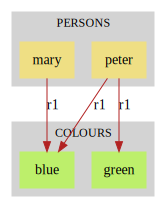

In [29]:
:dot expr_as_graph ("r1",{peter|->green,peter|->blue,mary|->blue})

In [31]:
:table {peter|->green,peter|->blue,mary|->blue}

|prj1|prj2|
|---|---|
|$\mathit{peter}$|$\mathit{green}$|
|$\mathit{peter}$|$\mathit{blue}$|
|$\mathit{mary}$|$\mathit{blue}$|


As in B a relation is a set of pairs, all set operators can be applied to relations.
For example,

In [30]:
{peter|->green,peter|->blue,mary|->blue} - {mary|->blue}

$\{(\mathit{peter}\mapsto \mathit{green}),(\mathit{peter}\mapsto \mathit{blue})\}$

In [32]:
{peter|->green,peter|->blue,mary|->blue} /\ {mary}*COLOURS

$\{(\mathit{mary}\mapsto \mathit{blue})\}$